In [93]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [45]:
# Import required libraries and modules
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [46]:
path_to_csv3 = '/content/gdrive/My Drive/glass.csv'

In [47]:
# Load data
glass= pd.read_csv(path_to_csv3)

In [48]:
print(glass.shape)
glass.describe()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [71]:
# Create arrays for the features and the response variable
y = glass['Type'].values
X = glass.drop('RI', axis=1).values






In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)
X_train.shape, X_test.shape

((128, 9), (86, 9))

In [109]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(), activation='relu', solver='adam', max_iter=50000)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))


[[42  0  0  0  0  0]
 [ 2 42  0  0  0  0]
 [ 0  8  4  0  0  0]
 [ 0  0  0  3  0  3]
 [ 0  0  0  0  5  0]
 [ 0  0  1  0  0 18]]
              precision    recall  f1-score   support

           1       0.95      1.00      0.98        42
           2       0.84      0.95      0.89        44
           3       0.80      0.33      0.47        12
           5       1.00      0.50      0.67         6
           6       1.00      1.00      1.00         5
           7       0.86      0.95      0.90        19

    accuracy                           0.89       128
   macro avg       0.91      0.79      0.82       128
weighted avg       0.89      0.89      0.88       128



In [107]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[28  0  0  0  0  0]
 [ 2 30  0  0  0  0]
 [ 0  3  2  0  0  0]
 [ 0  0  0  5  0  2]
 [ 0  0  0  0  3  1]
 [ 0  0  0  0  0 10]]
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        28
           2       0.91      0.94      0.92        32
           3       1.00      0.40      0.57         5
           5       1.00      0.71      0.83         7
           6       1.00      0.75      0.86         4
           7       0.77      1.00      0.87        10

    accuracy                           0.91        86
   macro avg       0.94      0.80      0.84        86
weighted avg       0.92      0.91      0.90        86



In [143]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [144]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.38028169014084506


<Axes: xlabel='RI', ylabel='Type'>

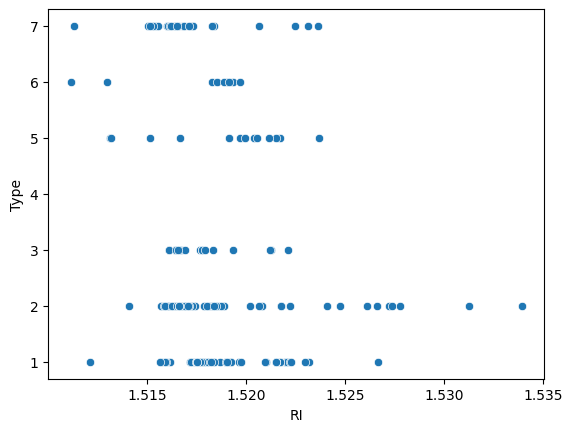

In [149]:
import seaborn as sns

sns.scatterplot(data = glass, x = 'RI', y = 'Type')